# 数据

In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import numpy as np
tf.enable_eager_execution()

Populating the interactive namespace from numpy and matplotlib
图片数字：5
训练数据 (60000, 784), (60000,)
测试数据 (10000, 784), (10000,)


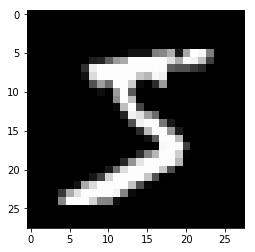

In [2]:
# 训练、测试集
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# 数据形状和类型变换
train_x = train_x.reshape([-1,28*28]).astype('float32')
test_x = test_x.reshape([-1,28*28]).astype('float32')
train_y = train_y.astype('int32')
test_y = test_y.astype('int32')

# 显示训练集
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(train_x[0].reshape([28,28]),cmap='gray')
print('图片数字：%s' %train_y[0])
print('训练数据 %s, %s' %(train_x.shape,train_y.shape))
print('测试数据 %s, %s' %(test_x.shape,test_y.shape))

# 自搭模型

In [3]:
# 初始化方法
def inits(shape):
    return tf.random_uniform(shape,
            minval=-np.sqrt(5) * np.sqrt(1.0 / shape[0]),
            maxval=np.sqrt(5) * np.sqrt(1.0 / shape[0]))
# 定义模型
class Model(object):
    def __init__(self):
        # 参数初始化
        self.W1 = tfe.Variable(inits([784,512]))
        self.b1 = tfe.Variable(inits([512]))
        self.W2 = tfe.Variable(inits([512,256]))
        self.b2 = tfe.Variable(inits([256]))
        self.W3 = tfe.Variable(inits([256,10]))
        self.b3 = tfe.Variable(inits([10]))
    def __call__(self, x):
        # 正向传递
        y = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
        y = tf.nn.relu(tf.matmul(y, self.W2) + self.b2)
        y = tf.matmul(y, self.W3) + self.b3
        return y
# 实例模型
model = Model()

# 训练

In [4]:
from sklearn.metrics import accuracy_score
# 误差函数
def loss(logits, label):
    loss = tf.losses.sparse_softmax_cross_entropy(labels=label, logits=logits)
    return loss

# 更新方式
def train(model, x, y, learning_rate, batch_size, epoch):
    # 更新次数
    for e in range(epoch):
        # 批量更新
        r = np.random.permutation(len(x))
        x = x[r]
        y = y[r]
        for b in range(0,len(x),batch_size):
            # 计算梯度
            with tf.GradientTape() as tape:
                loss_value = loss(model(x[b:b+batch_size]), y[b:b+batch_size])
                dW1, db1, dW2, db2, dW3, db3 = tape.gradient(loss_value, 
                                   [model.W1, model.b1, model.W2, model.b2, model.W3, model.b3])
            # 训练更新
            model.W1.assign_sub(dW1 * learning_rate)
            model.b1.assign_sub(db1 * learning_rate)
            model.W2.assign_sub(dW2 * learning_rate)
            model.b2.assign_sub(db2 * learning_rate)
            model.W3.assign_sub(dW3 * learning_rate)
            model.b3.assign_sub(db3 * learning_rate)
            
        # 显示
        train_p = model(train_x)
        test_p = model(test_x)
        print("Epoch: %03d | train loss: %.3f | train acc: %.3f | test loss: %.3f | test acc: %.3f" 
              %(e, loss(train_p, train_y), accuracy_score(tf.argmax(train_p,1), train_y),
                   loss(test_p, test_y), accuracy_score(tf.argmax(test_p,1), test_y)))

# 训练
train(model, train_x, train_y, learning_rate = 0.001, batch_size = 256, epoch = 50)

# 评估
test_p = model(test_x)
print("Final Test Loss: %s" %accuracy_score(tf.argmax(test_p,1), test_y))

Epoch: 000 | train loss: 0.934 | train acc: 0.880 | test loss: 1.072 | test acc: 0.873
Epoch: 001 | train loss: 0.562 | train acc: 0.906 | test loss: 0.729 | test acc: 0.892
Epoch: 002 | train loss: 0.401 | train acc: 0.925 | test loss: 0.596 | test acc: 0.905
Epoch: 003 | train loss: 0.324 | train acc: 0.933 | test loss: 0.539 | test acc: 0.909
Epoch: 004 | train loss: 0.263 | train acc: 0.942 | test loss: 0.492 | test acc: 0.914
Epoch: 005 | train loss: 0.223 | train acc: 0.950 | test loss: 0.466 | test acc: 0.917
Epoch: 006 | train loss: 0.192 | train acc: 0.954 | test loss: 0.445 | test acc: 0.920
Epoch: 007 | train loss: 0.170 | train acc: 0.960 | test loss: 0.428 | test acc: 0.922
Epoch: 008 | train loss: 0.149 | train acc: 0.964 | test loss: 0.412 | test acc: 0.925
Epoch: 009 | train loss: 0.136 | train acc: 0.965 | test loss: 0.409 | test acc: 0.926
Epoch: 010 | train loss: 0.121 | train acc: 0.970 | test loss: 0.399 | test acc: 0.927
Epoch: 011 | train loss: 0.108 | train acc:

# 用 API 建模型

In [5]:
model = tf.keras.Sequential([
          tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
          tf.keras.layers.Dense(256, activation=tf.nn.relu),
          tf.keras.layers.Dense(10)
        ])

# 用 API 训练

In [6]:
# 误差函数
def loss(logits, label):
    loss = tf.losses.sparse_softmax_cross_entropy(labels=label, logits=logits)
    return loss

# 更新方式
def train(model, x, y, learning_rate, batch_size, epoch):
    # 更新次数
    for e in range(epoch):
        # 批量更新
        r = np.random.permutation(len(x))
        x = x[r]
        y = y[r]
        for b in range(0,len(x),batch_size):
            # 计算梯度
            with tf.GradientTape() as tape:
                loss_value = loss(model(x[b:b+batch_size]), y[b:b+batch_size])
                grads = tape.gradient(loss_value, model.variables)
            # 训练更新
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            optimizer.apply_gradients(zip(grads, model.variables),
                            global_step=tf.train.get_or_create_global_step())
        # 显示
        train_p = model(train_x)
        test_p = model(test_x)
        print("Epoch: %03d | train loss: %.3f | train acc: %.3f | test loss: %.3f | test acc: %.3f" 
              %(e, loss(train_p, train_y), accuracy_score(tf.argmax(train_p,1), train_y),
                   loss(test_p, test_y), accuracy_score(tf.argmax(test_p,1), test_y)))

# 训练
train(model, train_x, train_y, learning_rate = 0.001, batch_size = 256, epoch = 50)

# 评估
test_p = model(test_x)
print("Final Test Loss: %s" %accuracy_score(tf.argmax(test_p,1), test_y))

Epoch: 000 | train loss: 0.902 | train acc: 0.909 | test loss: 1.105 | test acc: 0.899
Epoch: 001 | train loss: 0.524 | train acc: 0.928 | test loss: 0.796 | test acc: 0.908
Epoch: 002 | train loss: 0.366 | train acc: 0.940 | test loss: 0.667 | test acc: 0.913
Epoch: 003 | train loss: 0.255 | train acc: 0.957 | test loss: 0.582 | test acc: 0.924
Epoch: 004 | train loss: 0.195 | train acc: 0.964 | test loss: 0.538 | test acc: 0.928
Epoch: 005 | train loss: 0.152 | train acc: 0.971 | test loss: 0.519 | test acc: 0.930
Epoch: 006 | train loss: 0.129 | train acc: 0.974 | test loss: 0.507 | test acc: 0.930
Epoch: 007 | train loss: 0.105 | train acc: 0.978 | test loss: 0.491 | test acc: 0.933
Epoch: 008 | train loss: 0.086 | train acc: 0.983 | test loss: 0.477 | test acc: 0.933
Epoch: 009 | train loss: 0.073 | train acc: 0.985 | test loss: 0.469 | test acc: 0.935
Epoch: 010 | train loss: 0.060 | train acc: 0.988 | test loss: 0.466 | test acc: 0.935
Epoch: 011 | train loss: 0.052 | train acc:

# 预测

真实数字：2
预测数字：2


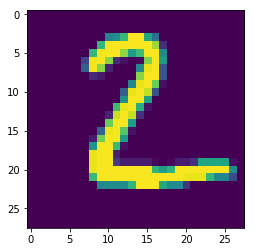

In [7]:
imgplot = plt.imshow(test_x[1].reshape((28,28)))
print('真实数字：%s' %test_y[1])
print('预测数字：%s' %tf.argmax(test_p[1]).numpy())